정규분포의 확률밀도 계산

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%precision 3
%matplotlib inline

In [2]:
sp.pi

3.142

In [3]:
#e의 1승
sp.exp(1)

<ipython-input-3-81baff3dcfbd>:2: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  sp.exp(1)


2.718281828459045

In [4]:
#평균 4, 분산 0.64(표준편차 0.8)인 정규분포에 대해 확률변수가 3일 때의 확률밀도
x=3
mu=4
sigma=0.8
1/(sp.sqrt(2*sp.pi*sigma**2))*sp.exp(-((x-mu)**2)/(2*sigma**2))

<ipython-input-4-7dbe16e2e4c4>:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  1/(sp.sqrt(2*sp.pi*sigma**2))*sp.exp(-((x-mu)**2)/(2*sigma**2))
<ipython-input-4-7dbe16e2e4c4>:5: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  1/(sp.sqrt(2*sp.pi*sigma**2))*sp.exp(-((x-mu)**2)/(2*sigma**2))


0.22831135673627742

간단화

In [5]:
stats.norm.pdf(loc=4, scale=0.8, x=3)

0.2283113567362774

In [6]:
norm_dist=stats.norm(loc=4, scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

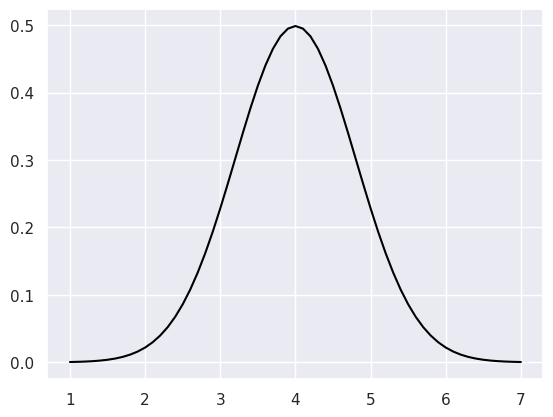

In [8]:
x_plot=np.arange(1,7.1,0.1)
plt.plot(
    x_plot, #x축
    stats.norm.pdf(x=x_plot, loc=4, scale=0.8), #y축
    color='black'
)

표본이 어떤 값 이하가 되는 비율

(어떤 값 이하가 되는 데이터 수) / (샘플사이즈)

In [9]:
np.random.seed(1)
simulated_sample=stats.norm.rvs(
    loc=4, scale=0.8, size=100000)
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

In [12]:
sp.sum(simulated_sample[1:4])

<ipython-input-12-73e48b5a4342>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum(simulated_sample[1:4])


10.229682569544238

In [10]:
sp.sum(simulated_sample<=3) #값 자체는 2,345 이런데 이는 각각의 확률변수 이므로 sum 하면 1씩

<ipython-input-10-481eb2be190f>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum(simulated_sample<=3)


10371

In [11]:
sp.sum(simulated_sample<=3)/len(simulated_sample)

<ipython-input-11-42b8d56274d2>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum(simulated_sample<=3)/len(simulated_sample)


0.10371

누적분포함수: 해당 범위에 해당하는 확률

In [13]:
stats.norm.cdf(loc=4, scale=0.8, x=3)

0.10564977366685535

In [14]:
#정규분포는 좌우대칭이므로
stats.norm.cdf(loc=4, scale=0.8, x=4)

0.5

하측확률: 데이터가 어떤 값 이하가 될 확률(누적분포함수)

퍼센트포인트: 어떤 확률이 될 기준치

In [15]:
#하측확률이 2.5%가 되는 퍼센트포인트
stats.norm.ppf(loc=4, scale=0.8, q=0.025)

2.4320288123679563

In [17]:
lower=stats.norm.cdf(loc=4, scale=0.8, x=3)
stats.norm.ppf(loc=4, scale=0.8, q=lower)

3.0000000000000004

In [18]:
stats.norm.ppf(loc=4, scale=0.8, q=0.5)

4.0

표준정규분포: 평균 0, 분산 1인 정규분포

t값: (표본평균 - 모평균) / (표준오차)

표준오차는 표본평균의 표준편차, t값은 표본평균에 대한 표준화

t값의 표본분포

In [19]:
#난수 시드 설정
np.random.seed(1)
#t값을 저장할 변수 설정
t_value_array=np.zeros(10000)
#정규분포 클래스의 인스턴스
norm_dist=stats.norm(loc=4, scale=0.8)
#시뮬레이션 실행
for i in range(0,10000):
  sample=norm_dist.rvs(size=10)
  sample_mean=sp.mean(sample) #표본평균
  sample_std=sp.std(sample,ddof=1) #표본의 표준편차
  sample_se=sample_std/sp.sqrt(len(sample)) #표준오차: 표본평균의 표준편차
  t_value_array[i]=(sample_mean-4)/sample_se

<ipython-input-19-0fb138f79fe5>:10: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sample_mean=sp.mean(sample)
<ipython-input-19-0fb138f79fe5>:11: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sample_std=sp.std(sample,ddof=1)
<ipython-input-19-0fb138f79fe5>:12: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sample_se=sample_std/sp.sqrt(len(sample))


<ipython-input-20-c78ac3d46fdb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t_value_array, color='black')


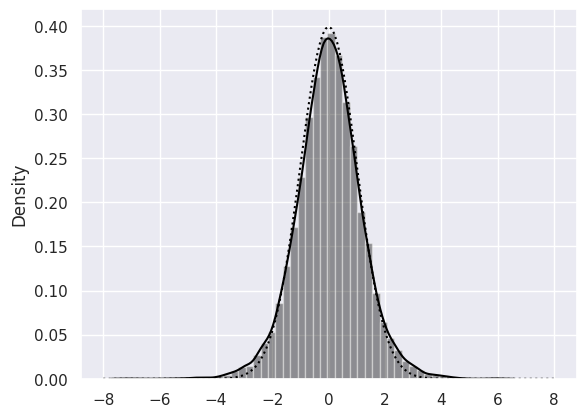

In [20]:
sns.distplot(t_value_array, color='black')
x=np.arange(-8,8.1,0.1)
plt.plot(x, stats.norm.pdf(x=x),color='black',linestyle='dotted')

t분포: 모집단분포가 정규분포일때 t값의 표본분포

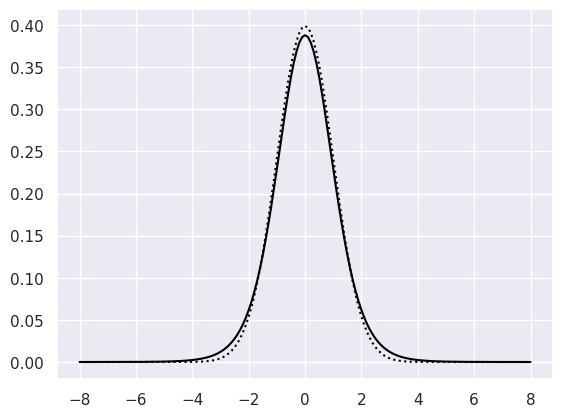

In [21]:
plt.plot(x, stats.norm.pdf(x=x), color='black', linestyle='dotted')
plt.plot(x, stats.t.pdf(x=x, df=9), color='black')

-> t분포(실선)의 밑단이 더 넓은 분포. 평균값과 다른 데이터 발생하기 쉬워짐